# Определение перспективного тарифа для телеком-компании

компания «Мегалайн» — федеральный оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. Предоставлены данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файлов

### Импортируем библиотеки

In [1]:
import pandas as pd
import math as np
import datetime as dt
import numpy as np
from scipy import stats as st

### Изучение файла calls (информация о звонках)

In [2]:
# открываем и выводим таблицу
calls = pd.read_csv('/datasets/calls.csv')
display(calls)
# выводим информацию по таблице
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Открыв файл calls мы видим, что в таблице 202 607 строк и 4 колонки. Присутствуют такие типы как: object, float64 и int64. В таблице указана информация о дате звонка и его продолжительности, а также id клиента.

### Изучение файла internet (информация об интернет-сессиях)

In [3]:
# открываем и выводим таблицу
internet = pd.read_csv('/datasets/internet.csv')
display(internet)
# выводим информацию по таблице
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Открыв файл internet мы видим, что таблица состоит из 149 396 строк и 5 колонок. Присутствуют типы данных как: int64, float64 и object. В таблице указана информаци о потраченных мегабайтах, дате сессии и id клиента.

### Изучение файла messages (информация о сообщениях)

In [4]:
# открываем и выводим таблицу
messages = pd.read_csv('/datasets/messages.csv')
display(messages)
# выводим информацию по таблице
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Открыв файл messages мы видим, что таблица состоит из 123 036 строк и 3 колонок. Присутствуют типы данных как: int64 и object. В таблице информация по дате отправки сообщений и id клиента.

### Изучение файла tariffs (информация о тарифах)

In [5]:
# открываем и выводим таблицу
tariffs = pd.read_csv('/datasets/tariffs.csv')
display(tariffs)
# выводим информацию по таблице
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Открыв файл tariffs мы видим, что таблица состоит из 2 строк и 8 колонок. Присутствуют типы данных как: int64 и object. В таблице информация по изучаемым тарифам - сколько включено сообщений, мегабайт, минут включено в тариф. Ежемесячная плата. И тарифы за минуты разговора, сообщений и гигабайт сверх тарифа.

### Изучение файла users (информация о пользователях)

In [6]:
# открываем и выводим таблицу
users = pd.read_csv('/datasets/users.csv')
display(users)
# выводим информацию по таблице
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Открыв файл users мы видим, что таблица состоит из 500 строк и 8 колонок. Присутствуют типы данных как: int64 и object. В таблице информация по возрасту клиента, в каком он живет городе, имени и фамилии, дате регистрации и подключенном тарифе.

### Общий вывод по изучению файлов

Необходимые бибилиотеки импортированы. Файлы открыты и изучены.

## Предобработка данных

### Предобработка данных в таблице calls

In [7]:
# заменяем тип данных в колонке call_date
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
# делаем новый стобец в который из даты выделяем только месяц
calls['month'] = calls['call_date'].dt.month
# смотрим какие значения встречаются в колонке duration
calls['duration'].value_counts()
# переводим столбец duration в минуты и округляем в большую сторону
calls['duration'] = calls['duration'].apply(np.ceil)

### Предобработка данных в таблице internet

In [8]:
# заменяем тип данных в колонке session_date
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
# делаем новый столбец в который из даты выделяем только месяц
internet['month'] = internet['session_date'].dt.month
# смотрим, какие значение встречаются в колонке mb_used
internet['mb_used'].value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

### Предобработка данных в таблице messages


In [9]:
# заменяем тип данных в колонке message_date
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
# делаем новый столбец в который из даты выделяем только месяц
messages['month'] = messages['message_date'].dt.month

### Предобработка данных в таблице users

In [10]:
# заменяем тип данных в колонке reg_date
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

### Вывод по предобработке данных

В каждой из таблиц были выполнены некоторые преобразования. Почти в каждой таблице где есть связь с датой - тип данных с object был заменен на to_datetime и создан новый столбец в который был выделен только месяц (это необходимо для дальнейшей работы с подсчетами по месяцам). В таблице calls были найдены нулевые значения длительности звонка - это пропущенные звонки. В таблице internet мы также видим нулевые значения - возможно это связано с тем, что у человека плохо ловила сеть и страница браузера не прогуражалась. Эта сессия считалась начатой и тут же законченной. в таблице users в колонке churn_date (дата прекращения пользования тарифом) имеются пропущенные значения - но заменять их не имеет смысла, т.к. если значение пропущено - значит на момент выгрузки тариф еще использовался.

## Делаем подсчеты для каждого пользователя

### Подсчитываем количество сделанных звонков по месяцам для каждого пользователя

In [11]:
# формируем сводную таблицу звонков по месяцам для каждого пользователя
duration_calls = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum')
# переименовываем столбец суммы разговора
duration_calls.columns = ['total_duraion']
# выводим сводную таблицу
display(duration_calls)

total_duraion
user_id month               
1000    5              159.0
        6              172.0
        7              340.0
        8              408.0
        9              466.0
...                      ...
1498    10             247.0
1499    9               70.0
        10             449.0
        11             612.0
        12             492.0

[3174 rows x 1 columns]

### Подсчитываем количество израсходованных минут разговора по месяцам для каждого пользователя

In [12]:
# делаем сводную таблицу количества звонков по месяцам для каждого пользователя
number_of_calls = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='count')
# переименовываем столбец с количеством 
number_of_calls.columns = ['number_of_calls_by_month']
# выводим сводную таблицу
display(number_of_calls)

number_of_calls_by_month
user_id month                          
1000    5                            22
        6                            43
        7                            47
        8                            52
        9                            58
...                                 ...
1498    10                           41
1499    9                             9
        10                           68
        11                           74
        12                           69

[3174 rows x 1 columns]

### Подсчитываем количество отправленных сообщений по месяцам для каждого пользователя

In [13]:
# делаем сводную таблицу количества сообщений по месяцам для каждого пользователя
number_of_messages = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count')
# переименовываем столбец
number_of_messages.columns = ['total_messages']
# выводим таблицу
display(number_of_messages)

total_messages
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

### Подсчитываем объем израсходованного интернет-трафика по месяцам для каждого пользователя

In [14]:
# делаем сводную таблицу трафика в гб к пользователям
used_traffic = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
# переименовываем столбец с суммой траффика в гб по месяцам для каждого пользователя
used_traffic.columns = ['total_traffic_mb']
# создаем новый столбец, переводим total_traffic_mb в ГБ и округляем в большую сторону (согласно правилам тарифа)
used_traffic['total_traffic_gb'] = (used_traffic['total_traffic_mb'] / 1024).apply(np.ceil)
display(used_traffic)

total_traffic_mb  total_traffic_gb
user_id month                                    
1000    5               2253.49               3.0
        6              23233.77              23.0
        7              14003.64              14.0
        8              14055.93              14.0
        9              14568.91              15.0
...                         ...               ...
1498    10             20579.36              21.0
1499    9               1845.75               2.0
        10             17788.51              18.0
        11             17963.31              18.0
        12             13055.58              13.0

[3203 rows x 2 columns]

### Подсчитываем помесячную выручку по каждому пользователю

In [15]:
# соединяем табоицы duration_calls, number_of_messages и used_traffic
grouped_data = (
    duration_calls.merge(
        number_of_messages, on=['user_id', 'month'], how='outer').merge(
    used_traffic['total_traffic_gb'], on=['user_id', 'month'], how='outer')
).reset_index()
# выводим таблицу
display(grouped_data)

,user_id,month,total_duraion,total_messages,total_traffic_gb
0,1000,5,159.0,22.0,3.0
1,1000,6,172.0,60.0,23.0
2,1000,7,340.0,75.0,14.0
3,1000,8,408.0,81.0,14.0
4,1000,9,466.0,57.0,15.0
...,...,...,...,...,...
3209,1489,9,NaN,32.0,17.0
3210,1489,10,NaN,21.0,20.0
3211,1489,11,NaN,20.0,18.0
3212,1489,12,NaN,35.0,17.0


In [16]:
# соединяем предыдущую таблицу в таблицей users добавляя город и тарифный план
grouped_data = grouped_data.merge(users[['user_id','city', 'tariff']], on='user_id', how='outer')

In [17]:
# выводим таблицу
display(grouped_data)

,user_id,month,total_duraion,total_messages,total_traffic_gb,city,tariff
0,1000,5.0,159.0,22.0,3.0,Краснодар,ultra
1,1000,6.0,172.0,60.0,23.0,Краснодар,ultra
2,1000,7.0,340.0,75.0,14.0,Краснодар,ultra
3,1000,8.0,408.0,81.0,14.0,Краснодар,ultra
4,1000,9.0,466.0,57.0,15.0,Краснодар,ultra
...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,21.0,20.0,Санкт-Петербург,smart
3212,1489,11.0,NaN,20.0,18.0,Санкт-Петербург,smart
3213,1489,12.0,NaN,35.0,17.0,Санкт-Петербург,smart
3214,1128,NaN,NaN,NaN,NaN,Волжский,ultra


In [18]:
# прописываем цикл, чтобы найти помесячную выручку по каждому пользователю

grouped_data['total_income'] = 0
for row_number in range(len(grouped_data)):
    # проходим по всей таблице и выделяем строки где тариф равен тарифному плану ultra
    if grouped_data.loc[row_number, 'tariff'] == 'ultra':
        # те строки, где тарифный план ultra добавляем абонентскую плату 1960 рублей
        grouped_data.loc[row_number, 'total_income'] += 1950
        # прописываем условие, что абонент проговорил более 3000 минут (завленных в тарифе)
        if grouped_data.loc[row_number, 'total_duraion'] > 3000:
            # то прибавляем перерасход использованного тарифа и умножаем на стоимость сверх тарифного пакета
            grouped_data.loc[row_number, 'total_income'] += (grouped_data.loc[row_number, 'total_duraion'] - 3000) * 1
        # проверяем условие, что абонент отправил более 1000 сообщений (заявленных в тарифе)
        if grouped_data.loc[row_number, 'total_messages'] > 1000:
            # прибавляем перерасход сообщений и умножаем на стоимость сверх тарифного пакета
            grouped_data.loc[row_number, 'total_income'] += (grouped_data.loc[row_number, 'total_messages'] - 1000) * 1
        # проверяем условие, что абонент использовал более 30ГБ интернет трафика 
        if grouped_data.loc[row_number, 'total_traffic_gb'] > 30:
            # и добавляем перерасход используемого трафика, умножая на стоимость сверх тарифного пакета
            grouped_data.loc[row_number, 'total_income'] += (grouped_data.loc[row_number, 'total_traffic_gb'] - 30) * 150
    else:
        # здесь остались тарифы smart
        # добавляем стоимость абонентской планы по тарифу smart
        grouped_data.loc[row_number, 'total_income'] += 550
        # проверяем условие, что абонент проговорил более 500 минут (заявленных в тарифе)
        if grouped_data.loc[row_number, 'total_duraion'] > 500:
            # прибавляем перерасход минут и умножаем на стоимость сверх тарифного плана
            grouped_data.loc[row_number, 'total_income'] += (grouped_data.loc[row_number, 'total_duraion'] - 500) * 3
        # проверяем условие, что абонент отправил более 50 сообщений (заявленных в тарифе)
        if grouped_data.loc[row_number, 'total_messages'] > 50:
            # добавляем перерасчет сообщений и умножаем на стоимость сверх тарифного плана
            grouped_data.loc[row_number, 'total_income'] += (grouped_data.loc[row_number, 'total_messages'] - 50) * 3
        # проверяем условие, что абонент использовал более 15ГБ интернет трафика
        if grouped_data.loc[row_number, 'total_traffic_gb'] > 15:
            # добавляем перерасход интернет трафика и умножаем на стоимость сверх тарифного плана
            grouped_data.loc[row_number, 'total_income'] += (grouped_data.loc[row_number, 'total_traffic_gb'] - 15) * 200
            

In [19]:
# объединяем данные, теперь чтобы посчитать траты на звонки, достаточно умножать и складывать столбцы
grouped_data.merge(tariffs.rename(columns={'tariff_name': 'tariff'}), on='tariff')

,user_id,month,total_duraion,total_messages,total_traffic_gb,city,tariff,total_income,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,22.0,3.0,Краснодар,ultra,1950.0,1000,30720,3000,1950,150,1,1
1,1000,6.0,172.0,60.0,23.0,Краснодар,ultra,1950.0,1000,30720,3000,1950,150,1,1
2,1000,7.0,340.0,75.0,14.0,Краснодар,ultra,1950.0,1000,30720,3000,1950,150,1,1
3,1000,8.0,408.0,81.0,14.0,Краснодар,ultra,1950.0,1000,30720,3000,1950,150,1,1
4,1000,9.0,466.0,57.0,15.0,Краснодар,ultra,1950.0,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,NaN,32.0,17.0,Санкт-Петербург,smart,950.0,50,15360,500,550,200,3,3
3212,1489,10.0,NaN,21.0,20.0,Санкт-Петербург,smart,1550.0,50,15360,500,550,200,3,3
3213,1489,11.0,NaN,20.0,18.0,Санкт-Петербург,smart,1150.0,50,15360,500,550,200,3,3
3214,1489,12.0,NaN,35.0,17.0,Санкт-Петербург,smart,950.0,50,15360,500,550,200,3,3


In [20]:
# выводим первые 15 строк таблицы
display(grouped_data.head(15))
grouped_data.info()

,user_id,month,total_duraion,total_messages,total_traffic_gb,city,tariff,total_income
0,1000,5.0,159.0,22.0,3.0,Краснодар,ultra,1950.0
1,1000,6.0,172.0,60.0,23.0,Краснодар,ultra,1950.0
2,1000,7.0,340.0,75.0,14.0,Краснодар,ultra,1950.0
3,1000,8.0,408.0,81.0,14.0,Краснодар,ultra,1950.0
4,1000,9.0,466.0,57.0,15.0,Краснодар,ultra,1950.0
5,1000,10.0,350.0,73.0,15.0,Краснодар,ultra,1950.0
6,1000,11.0,338.0,58.0,15.0,Краснодар,ultra,1950.0
7,1000,12.0,333.0,70.0,10.0,Краснодар,ultra,1950.0
8,1001,11.0,430.0,NaN,18.0,Москва,smart,1150.0
9,1001,12.0,414.0,NaN,14.0,Москва,smart,550.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 8 columns):
user_id             3216 non-null int64
month               3214 non-null float64
total_duraion       3174 non-null float64
total_messages      2717 non-null float64
total_traffic_gb    3203 non-null float64
city                3216 non-null object
tariff              3216 non-null object
total_income        3216 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB


### Общий вывод по расчетам

С помощью сводных таблиц мы рассчитали количество сделанных звонков по месяцам для каждого пользователя, количество израсходованных минут разговора по месяцам для каждого пользователя, количество отправленных сообщений по месяцам для каждого пользователя и объем израсходованного интернет-трафика по месяцам для каждого пользователя. Окргулили значения израсходованных мимнут и израсходованных мегабайт согласно условиям тарифа. Для того, чтобы подсчитать помесячную выручку по каждому пользователю необходимо было соединить все расчеты в сводных таблицах, и получившуюся таблицу объединить с таблицей users. С помощью цикла нашли помесячную выручку для каждого пользователя.

## Анализ данных

### Анализируем поведение клиентов тарифа smart и ultra

#### Анализируем поведение клиентов тарифов smart и ultra относительно длительности разговора

In [21]:
# делаем срез данных только по клиентам тарифа smart
grouped_users_smart = grouped_data.query('tariff == "smart"')
# выводим таблицу
display(grouped_users_smart)

,user_id,month,total_duraion,total_messages,total_traffic_gb,city,tariff,total_income
8,1001,11.0,430.0,NaN,18.0,Москва,smart,1150.0
9,1001,12.0,414.0,NaN,14.0,Москва,smart,550.0
10,1002,6.0,117.0,4.0,11.0,Стерлитамак,smart,550.0
11,1002,7.0,214.0,11.0,18.0,Стерлитамак,smart,1150.0
12,1002,8.0,289.0,13.0,20.0,Стерлитамак,smart,1550.0
...,...,...,...,...,...,...,...,...
3210,1489,9.0,NaN,32.0,17.0,Санкт-Петербург,smart,950.0
3211,1489,10.0,NaN,21.0,20.0,Санкт-Петербург,smart,1550.0
3212,1489,11.0,NaN,20.0,18.0,Санкт-Петербург,smart,1150.0
3213,1489,12.0,NaN,35.0,17.0,Санкт-Петербург,smart,950.0


In [22]:
# выводим список характерных значений для абонентов тарифа smart
grouped_users_smart['total_duraion'].describe()

count    2223.000000
mean      419.062978
std       189.325618
min         0.000000
25%       285.000000
50%       423.000000
75%       545.500000
max      1435.000000
Name: total_duraion, dtype: float64

In [23]:
# делаем срез данных только для клиентов тарифа ultra
grouped_users_ultra = grouped_data.query('tariff == "ultra"')
# выводим таблицу
display(grouped_users_ultra)

,user_id,month,total_duraion,total_messages,total_traffic_gb,city,tariff,total_income
0,1000,5.0,159.0,22.0,3.0,Краснодар,ultra,1950.0
1,1000,6.0,172.0,60.0,23.0,Краснодар,ultra,1950.0
2,1000,7.0,340.0,75.0,14.0,Краснодар,ultra,1950.0
3,1000,8.0,408.0,81.0,14.0,Краснодар,ultra,1950.0
4,1000,9.0,466.0,57.0,15.0,Краснодар,ultra,1950.0
...,...,...,...,...,...,...,...,...
3205,1473,9.0,NaN,19.0,17.0,Красноярск,ultra,1950.0
3206,1473,10.0,NaN,20.0,14.0,Красноярск,ultra,1950.0
3207,1473,11.0,NaN,14.0,22.0,Красноярск,ultra,1950.0
3208,1473,12.0,NaN,20.0,18.0,Красноярск,ultra,1950.0


In [24]:
# выводим список характерных значений для абонентов тарифа ultra
grouped_users_ultra['total_duraion'].describe()

count     951.000000
mean      545.451104
std       306.925754
min         0.000000
25%       310.000000
50%       528.000000
75%       756.500000
max      1673.000000
Name: total_duraion, dtype: float64

In [25]:
# находим среднее значение по потраченным минутам для клиентов тарифа smart
mean_duration_smart = grouped_users_smart['total_duraion'].mean()
print('Срднее значение минут по тарифу smart:', mean_duration_smart)

# находим среднее значение по потраченным минутам для клинетов тарифа ultra
mean_duration_ultra = grouped_users_ultra['total_duraion'].mean()
print('Среднее значение минут по тарифу ultra:', mean_duration_ultra)

Срднее значение минут по тарифу smart: 419.0629779577148
Среднее значение минут по тарифу ultra: 545.4511041009464


In [26]:
# находим дисперсию минут для тарифа smart
variance_duration_smart = np.var(grouped_users_smart['total_duraion'], ddof=1)
print('Дисперсия минут по тарифу smart равна:', variance_duration_smart)

# находим дисперсию минут для тарифа ultra
variance_duration_ultra = np.var(grouped_users_ultra['total_duraion'], ddof=1)
print('Дисперсия минут по тарифу ultra равна:', variance_duration_ultra)

Дисперсия минут по тарифу smart равна: 35844.1895513438
Дисперсия минут по тарифу ultra равна: 94203.41839614812


In [27]:
# находим стандартное отклонение минут по тарифу smart
duration_standard_deviation_smart = np.sqrt(variance_duration_smart)
print('Стандартное отклонение минут по тарифу smart равно:', duration_standard_deviation_smart)

# находим стандартное отклонение минут по тарифу ultra
duration_standard_deviation_ultra = np.sqrt(variance_duration_ultra)
print('Стандартное отклонение минут по тарифу ultra равно:', duration_standard_deviation_ultra)

Стандартное отклонение минут по тарифу smart равно: 189.3256177894154
Стандартное отклонение минут по тарифу ultra равно: 306.92575388218586


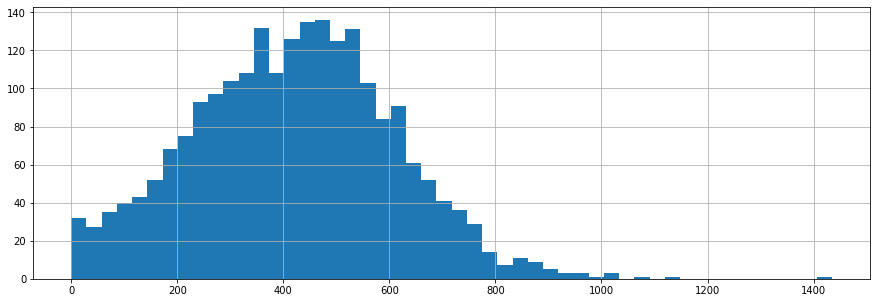

In [28]:
# строим гистрограмму по длительности разговоров для пользователей тарифа smart
grouped_users_smart['total_duraion'].hist(bins=50, figsize=(15,5))

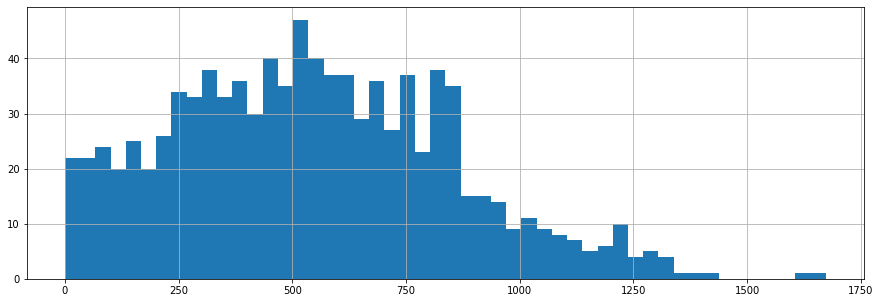

In [29]:
# строим гистограмму по длительности разговоров для пользователей тарифа ultra
grouped_users_ultra['total_duraion'].hist(bins=50, figsize=(15,5))

#### Вывод по анализу поведения клиентов тарифов smart и ultra относительно длительности разговора

Срез данных показал, что абонентов которые пользуются тарифным планов smart больше, чем тех, кто пользуется тарифным планов ultra. Количество абонентов smart: 2230, количество абонентов ultra: 986. Видимо, тариф smart более популярнее среди пользователей.

Дисперсия и стандартное отклонения показывают, на сколько данные близки или далеки друг от друга. В ситуации с тарифом smart видно, что мы имеем "хвост" в данных по длительности звонков. Аналогичная ситуация наблюдается с тарифом ultra, только "хвост" здесь длиннее, чем у пользователей тарифа smart. Построив гистограммы - мы убедились в этом. Распределение данных похоже на нормальное, так как среднее значение и медианное совсем рядом. Также, можем отметить, что с тарифом ultra люди тратят большее количество минут на разговоры.

#### Анализируем поведение клиентов тарифов smart и ultra относительно отправленным СМС-сообщений

In [30]:
# срезы данных есть выше, поспользуемся ими

# # находим среднее значение по смс-сообщениям для клиентов тарифа smart
mean_messages_smart = grouped_users_smart['total_messages'].mean()
print('Среднее значение количества смс-сообщений по тарифу smart:', mean_messages_smart)

# находим среднее значение по смс-сообщениям для клиентов тарифа ultra
mean_messages_ultra = grouped_users_ultra['total_messages'].mean()
print('Среднее значение количества смс-сообщений по тарифу ultra:', mean_messages_ultra)

Среднее значение количества смс-сообщений по тарифу smart: 38.71644120707596
Среднее значение количества смс-сообщений по тарифу ultra: 61.161006289308176


In [31]:
# находим дисперсию смс-сообщений для тарифа smart
variance_messages_smart = np.var(grouped_users_smart['total_messages'], ddof=1)
print('Дисперсия смс-сообщений по тарифу smart равна:', variance_messages_smart)

# находим дисперсию смс-сообщений для тарифа ultra
variance_messages_ultra = np.var(grouped_users_ultra['total_messages'], ddof=1)
print('Дисперсия смс-сообщений по тарифу ultra равна:', variance_messages_ultra)

Дисперсия смс-сообщений по тарифу smart равна: 717.5942011753547
Дисперсия смс-сообщений по тарифу ultra равна: 2109.6591828651995


In [32]:
# находим стандартное отклонение смс-сообщений по тарифу smart
messages_standard_deviation_smart = np.sqrt(variance_messages_smart)
print('Стандартное отклонение смс-сообщений по тарифу smart равно:', messages_standard_deviation_smart)

# находим стандартное отклонение смс-сообщений по тарифу ultra
messages_standard_deviation_ultra = np.sqrt(variance_messages_ultra)
print('Стандартное отклонение смс-сообщений по тарифу ultra равно:', messages_standard_deviation_ultra)

Стандартное отклонение смс-сообщений по тарифу smart равно: 26.787948804926344
Стандартное отклонение смс-сообщений по тарифу ultra равно: 45.93102636416042


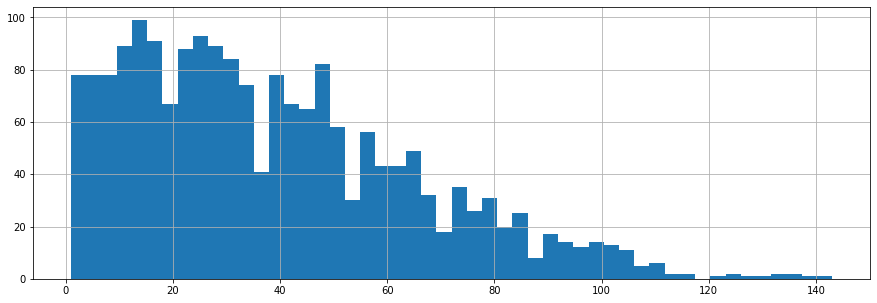

In [33]:
# строим гистрограмму по количетву отправленных смс-сообщений для пользователей тарифа smart
grouped_users_smart['total_messages'].hist(bins=50, figsize=(15,5))

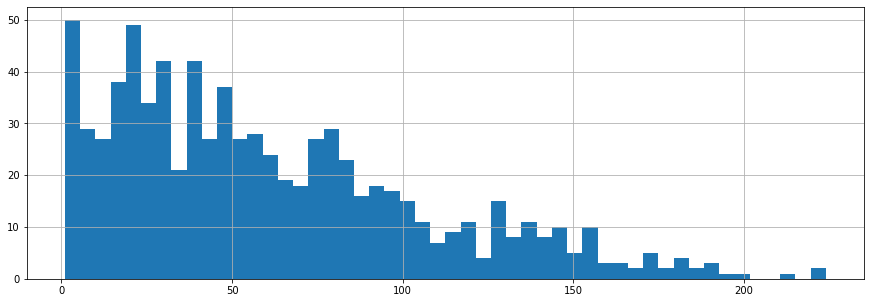

In [34]:
# строим гистограмму по количетву отправленных смс-сообщений для пользователей тарифа ultra
grouped_users_ultra['total_messages'].hist(bins=50, figsize=(15,5))

#### Вывод по анализу поведения клиентов тарифов smart и ultra относительно отправленным СМС-сообщений

Можем сказать, что по количеству отправленных сообщений у пользователей тарифа smart мы имеем "хвост" в данных, о чем свидетельствует дисперсия и стандартное отклонение. Визуализируя данные на гистограмме мы в этом убедились. Идентичная ситуация у пользователей тарифа ultra. Сравнив дисперсии и стандартное отклонение можно сказать, что "хвост" в данных у абонентов тарифа ultra больше, чем у абонентов тарифа smart. Наблюдаем скошенность данных - в правую сторону. Это говорит о том, что среднее больше чем медиана.

Также, смс-сообщения больше используются на тарифе ultra.

#### Анализируем поведение клиентов тарифов smart и ultra относительно объёма трафика

In [35]:
# находим среднее значение по использованному трафику для клиентов тарифа smart
mean_traffic_smart = grouped_users_smart['total_traffic_gb'].mean()
print('Среднее значение использованного интернет трафика по тарифу smart:', mean_traffic_smart)

# находим среднее значение по использованному трафику для клиентов тарифа ultra
mean_traffic_ultra = grouped_users_ultra['total_traffic_gb'].mean()
print('Среднее значение использованного интернет трафика по тарифу ultra:', mean_traffic_ultra)

Среднее значение использованного интернет трафика по тарифу smart: 16.33617594254937
Среднее значение использованного интернет трафика по тарифу ultra: 19.694358974358973


In [36]:
# находим дисперсию по использованному трафику для тарифа smart
variance_traffic_smart = np.var(grouped_users_smart['total_traffic_gb'], ddof=1)
print('Дисперсия по использованному трафику по тарифу smart равна:', variance_traffic_smart)

# находим дисперсию по использованному трафику для тарифа ultra
variance_traffic_ultra = np.var(grouped_users_ultra['total_traffic_gb'], ddof=1)
print('Дисперсия по использованному трафику по тарифу ultra равна:', variance_traffic_ultra)

Дисперсия по использованному трафику по тарифу smart равна: 32.92375582354312
Дисперсия по использованному трафику по тарифу ultra равна: 94.14673405991682


In [37]:
# находим стандартное отклонение по использованному трафику по тарифу smart
traffic_standard_deviation_smart = np.sqrt(variance_traffic_smart)
print('Стандартное отклонение по использованному трафику по тарифу smart равно:', traffic_standard_deviation_smart)

# находим стандартное отклонение по использованному трафику по тарифу ultra
traffic_standard_deviation_ultra = np.sqrt(variance_traffic_ultra)
print('Стандартное отклонение по использованному трафику по тарифу ultra равно:', traffic_standard_deviation_ultra)

Стандартное отклонение по использованному трафику по тарифу smart равно: 5.737922605224221
Стандартное отклонение по использованному трафику по тарифу ultra равно: 9.70292399536948


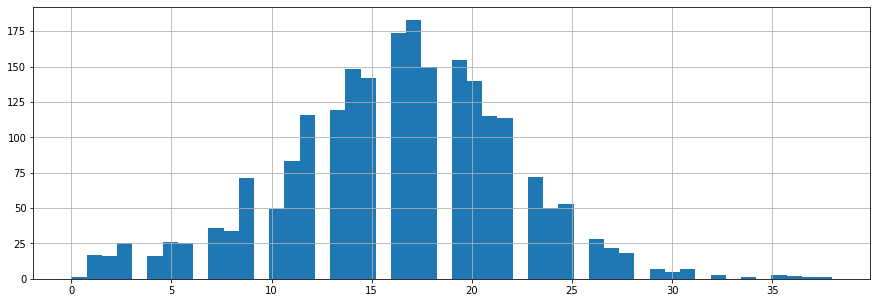

In [38]:
# строим гистрограмму по использованному трафику для пользователей тарифа smart
grouped_users_smart['total_traffic_gb'].hist(bins=50, figsize=(15,5))

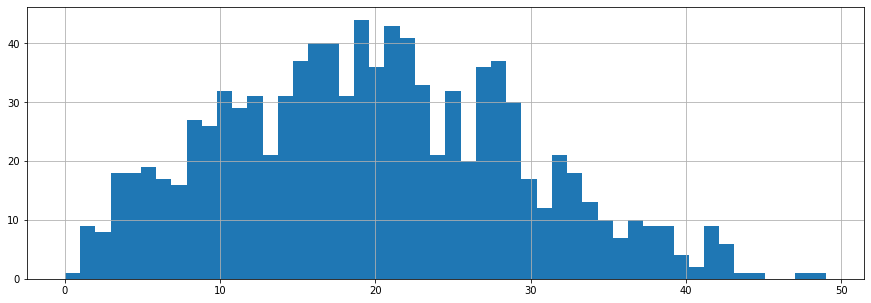

In [39]:
# строим гистограмму по использованному трафику для пользователей тарифа ultra
grouped_users_ultra['total_traffic_gb'].hist(bins=50, figsize=(15,5))

#### Вывод по анализу поведения клиентов тарифов smart и ultra относительно объёма трафика

Дисперсия и стандартно отклонение показывают, что данные находятся достаточно близко друг к другу. Распределения похожи на нормальные. Кажется, что пользователи используются почти одинаковый объем трафика на обоих тарифах.

###  Проверяем гипотезы

#### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [40]:
# находим среднюю выручку по тарифу smart
mean_income_smart = grouped_users_smart['total_income'].mean()
print('Средняя выручка по тарифу smart равна:', mean_income_smart)

# находим среднюю выручку по тарифу ultra
mean_income_ultra = grouped_users_ultra['total_income'].mean()
print('Средняя выручка по тарифу ultra равна:', mean_income_ultra)

Средняя выручка по тарифу smart равна: 1289.6417040358745
Средняя выручка по тарифу ultra равна: 2070.030425963489


In [41]:
# задаем пороговое значение
alpha = .05
# проверяем двустороннюю гипотезу
results = st.ttest_ind(
    grouped_users_smart['total_income'], 
    grouped_users_ultra['total_income'],
    equal_var=False)
# выводим p-значение
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не получилось')


p-значение 1.927011394420941e-250
Отвергаем нулевую гипотезу


Мы поверяли гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Нулевая гипотеза Н0 - средняя выручка по тарифам равна, альтернативная Н1 - средняя выручка по тарифам не равна. Пороговое значение 5% (общепринятое пороговое значение). После проведения t-теста мы отвергли нулевую гипотезу, что говорит о том, что средняя выручка по тарифам не равна.

#### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [42]:
# делаем срез данных абонентов из Москвы
grouped_data_moscow = grouped_data.query('city == "Москва"')
# находим среднюю выручку абонентов из Москвы
grouped_data_moscow_mean = grouped_data_moscow['total_income'].mean()
print('Среднее значение выручки для пользователей из Москвы:', grouped_data_moscow_mean)


# делаем срез данных абонентов из других городов
grouped_data_other = grouped_data.query('city != "Москва"')
# находим среднюю выучку абонентов из других городов
grouped_data_other_mean = grouped_data_other['total_income'].mean()
print('Среднее значение выручки для пользователей из других городов:', grouped_data_other_mean)

Среднее значение выручки для пользователей из Москвы: 1546.7135842880523
Среднее значение выручки для пользователей из других городов: 1524.7251439539348


In [43]:
# задаем пороговое значение
alpha = .05
# проверяем двухстороннюю гипотезу
results = st.ttest_ind(
    grouped_data_moscow['total_income'], 
    grouped_data_other['total_income'],
    equal_var=False
)
# выводим p-значение
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не получилось')

p-значение 0.5216952110000279
Отвергнуть нулевую гипотезу не получилось


Мы проверили гипотезу, что средняя выручка пользователей из Москвы отличается от пользователей других регионов. Нулевая гипотеза Н0 - средняя выручка для абонентов из Москвы и из других городов равна, альтернативная Н1 - средняя выручка для абонентов из Москвы и из другие городов не равна. Пороговое значение 5% (общепринятое пороговое значение). После проведения t-теста мы не смогли опровергнуть нулевую гипотезу, что говорит о том,что средняя выручка для абонентов из Москвы и из других городов равна.

## Общий вывод по проекту

Проанализировав выборку данных по пользователям и тарифам, можно сказать, что большей популярностью пользуется тариф smart. Им пользуется большее количество человек. Думаю, это связано с тем, что абонентская плата более выгодна, при это людям вполне хватает заявленных минут, сообщений и интернет трафика.